In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tejapi
tejapi.ApiConfig.api_key = 'your_key'
tejapi.ApiConfig.ignoretz = True

In [3]:
stk_info = tejapi.get('TWN/ANPRCSTD',
           paginate=True,
           chinese_column_name=True
          )
stk_nums = stk_info[(stk_info['上市別']=='TSE') & (stk_info['證券種類名稱']=='普通股')]['證券碼'].to_list()
stk_nums

['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 

In [4]:
# IFRS財務會計科目說明檔 #
acc = tejapi.get('TWN/AIACC',paginate=True) 
# 搜尋欄位代碼 #
key_word = '輸入關鍵字'
acc[acc['cname'].str.find(key_word)!=-1]

,id,code,acseq,cname,ename,unit,cgrp,egrp
None,,,,,,,,


In [5]:
%%time
# 撈取財務資料
zz = pd.DataFrame()
for code in stk_nums:
    zz = zz.append(
         tejapi.get('TWN/AIM1A',
                   coid=code,
                   paginate=True,
                   chinese_column_name=True,
                   opts= {'pivot':True,'columns':['coid','mdate','200D','R535','R505','R303','R304','MV']}).reset_index(drop=True)
    ).reset_index(drop=True)
    print(code)

1101
1102
1103
1104
1108
1109
1110
1201
1203
1210
1213
1215
1216
1217
1218
1219
1220
1225
1227
1229
1231
1232
1233
1234
1235
1236
1301
1303
1304
1305
1307
1308
1309
1310
1312
1313
1314
1315
1316
1319
1321
1323
1324
1325
1326
1339
1342
1402
1409
1410
1413
1414
1416
1417
1418
1419
1423
1432
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1449
1451
1452
1453
1454
1455
1456
1457
1459
1460
1463
1464
1465
1466
1467
1468
1470
1471
1472
1473
1474
1475
1476
1477
1503
1504
1506
1507
1512
1513
1514
1515
1516
1517
1519
1521
1522
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1535
1536
1537
1538
1539
1540
1541
1558
1560
1568
1582
1583
1587
1597
1598
1603
1604
1605
1608
1609
1611
1612
1614
1615
1616
1617
1618
1701
1702
1707
1708
1709
1710
1711
1712
1713
1714
1717
1718
1720
1721
1722
1723
1724
1725
1726
1727
1730
1731
1732
1733
1734
1735
1736
1737
1760
1762
1773
1776
1783
1786
1789
1795
1802
1805
1806
1808
1809
1810
1817
1903
1904
1905
1906
1907
1909
2002
2006
2007
2008
2009


In [6]:
zz['year'] = zz['財報年月'].dt.year
zz['month'] = zz['財報年月'].dt.month
data = zz[zz['month']==12].dropna().reset_index(drop=True)
data['indicator_start'], data['start'],data['end'] = data['財報年月']+pd.Timedelta(days=120-365), data['財報年月']+pd.Timedelta(days=120),data['財報年月']+pd.Timedelta(days=120+365)
# 季底市值中位數 #
mv_median = data.groupby(by=['year']).median()['季底普通股市值']
data['mv_median'] = data['year'].map(mv_median)
data

,公司代碼,財報年月,每股淨值(F)－TSE公告數,常續性EPS,負債比率,每股現金流量,每股營業額,季底普通股市值,year,month,indicator_start,start,end,mv_median
0,1101,2005-12-01,18.94,1.78,57.72,5.36,20.85,66313927.0,2005,12,2005-03-31,2006-03-31,2007-03-31,6083958.0
1,1101,2006-12-01,21.34,1.82,51.96,4.00,20.67,92520473.0,2006,12,2006-03-31,2007-03-31,2008-03-30,5054780.0
2,1101,2007-12-01,25.50,2.13,46.39,4.01,23.59,146188665.0,2007,12,2007-03-31,2008-03-30,2009-03-30,5305342.5
3,1101,2008-12-01,21.88,0.80,51.70,3.77,23.84,88724116.0,2008,12,2008-03-31,2009-03-31,2010-03-31,2619810.0
4,1101,2009-12-01,24.03,2.05,50.61,5.25,26.37,111933950.0,2009,12,2009-03-31,2010-03-31,2011-03-31,5947204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,9958,2016-12-01,12.58,0.43,60.01,1.03,12.30,1788779.0,2016,12,2016-03-31,2017-03-31,2018-03-31,5207830.5
12226,9958,2017-12-01,12.47,-0.14,58.78,1.43,11.05,3933830.0,2017,12,2017-03-31,2018-03-31,2019-03-31,5966831.0
12227,9958,2018-12-01,17.68,0.08,52.40,1.77,8.05,13566800.0,2018,12,2018-03-31,2019-03-31,2020-03-30,5566711.0
12228,9958,2019-12-01,21.22,0.27,49.96,-0.60,11.47,15147127.0,2019,12,2019-03-31,2020-03-30,2021-03-30,6492000.0


In [7]:
%%time
results = pd.DataFrame()
#coid = str(1101)
for coid in data['公司代碼'].unique():
    stock = tejapi.get('TWN/APRCD1',coid = coid, chinese_column_name = True)
    for year in data['year'].unique():
        condition = (data['year']==year) & (data['公司代碼']== coid)
        if (data[condition].size !=0):
            indicator_start = data['indicator_start'][condition].to_list()[0]
            stk_start = data['start'][condition].to_list()[0]
            stk_end = data['end'][condition].to_list()[0]
            # 抓取財報季度前一年的資料 #
            selected = stock[(stock['年月日'] > indicator_start) & (stock['年月日'] < stk_start)].reset_index(drop=True)
            back_test = stock[(stock['年月日'] >= stk_start) & (stock['年月日'] < stk_end)].reset_index(drop=True)
            if (selected.size!=0) and (back_test.size!=0):
                # 計算個年度最高與最低 本益比、股價淨值比、股價現金流量比和股價營收比 #
                price = selected['收盤價(元)'].tail(1).to_list()[0]
                stk_start_price = back_test['收盤價(元)'].head(1).to_list()[0]
                ## 本益比 ##
                EPS = data['常續性EPS'][condition].to_list()[0]
                PE = selected['收盤價(元)']/EPS
                PE_max = PE.max()
                PE_min = PE.min()
                ## 股價淨值比 ##
                BV = data['每股淨值(F)－TSE公告數'][condition].to_list()[0]
                PB = selected['收盤價(元)']/BV
                PB_max = PB.max()
                PB_min = PB.min()
                ## 股價現金流量比 ##
                CFP = data['每股現金流量'][condition].to_list()[0]
                PC = selected['收盤價(元)']/CFP
                PC_max = PC.max()
                PC_min = PC.min()
                ## 股價營收比 ##
                SP = data['每股營業額'][condition].to_list()[0]
                PS = selected['收盤價(元)']/SP
                PS_max = PS.max()
                PS_min = PS.min()
                # 彙整 # 
                result = pd.DataFrame({
                    'year':year,
                    '公司代碼':coid,
                    'stk_start':stk_start,
                    'stk_end':stk_end,
                    'stk_start_price':stk_start_price,
                    'PE_max':PE_max,'PE_min':PE_min,
                    'PB_max':PB_max,'PB_min':PB_min,
                    'PC_max':PC_max,'PC_min':PC_min,
                    'PS_max':PS_max,'PS_min':PS_min
                },index=[0])
                results = results.append(result).reset_index(drop=True)
    print(coid)

1101
1102
1103
1104
1108
1109
1110
1201
1203
1210
1213
1215
1216
1217
1218
1219
1220
1225
1227
1229
1231
1232
1233
1234
1235
1236
1301
1303
1304
1305
1307
1308
1309
1310
1312
1313
1314
1315
1316
1319
1321
1323
1324
1325
1326
1339
1342
1402
1409
1410
1413
1414
1416
1417
1418
1419
1423
1432
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1449
1451
1452
1453
1454
1455
1456
1457
1459
1460
1463
1464
1465
1466
1467
1468
1470
1471
1472
1473
1474
1475
1476
1477
1503
1504
1506
1507
1512
1513
1514
1515
1516
1517
1519
1521
1522
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1535
1536
1537
1538
1539
1540
1541
1558
1560
1568
1582
1583
1587
1597
1598
1603
1604
1605
1608
1609
1611
1612
1614
1615
1616
1617
1618
1701
1702
1707
1708
1709
1710
1711
1712
1713
1714
1717
1718
1720
1721
1722
1723
1724
1725
1726
1727
1730
1731
1732
1733
1734
1735
1736
1737
1760
1762
1773
1776
1783
1786
1789
1795
1802
1805
1806
1808
1809
1810
1817
1903
1904
1905
1906
1907
1909
2002
2006
2007
2008
2009


In [8]:
results #.rolling(7).mean()

,year,公司代碼,stk_start,stk_end,stk_start_price,PE_max,PE_min,PB_max,PB_min,PC_max,PC_min,PS_max,PS_min
0,2005,1101,2006-03-31,2007-03-31,8.9007,5.250393,3.240449,0.493437,0.304541,1.743601,1.076119,0.448235,0.276643
1,2006,1101,2007-03-31,2008-03-30,10.7298,6.562308,4.156923,0.559672,0.354527,2.985850,1.891400,0.577813,0.366018
2,2007,1101,2008-03-30,2009-03-30,23.9930,11.589437,5.019390,0.968059,0.419267,6.155985,2.666160,1.046439,0.453213
3,2008,1101,2009-03-31,2010-03-31,12.0699,29.889375,8.043000,1.092847,0.294077,6.342573,1.706737,1.002999,0.269899
4,2009,1101,2010-03-31,2011-03-31,13.3965,8.236780,6.151073,0.702680,0.524748,3.216267,2.401848,0.640326,0.478184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,2016,9958,2017-03-31,2018-03-31,9.1272,24.919302,20.334884,0.851773,0.695072,10.403204,8.489320,0.871163,0.710894
11795,2017,9958,2018-03-31,2019-03-31,78.1576,-62.435714,-578.380000,6.493440,0.700962,56.624615,6.112587,7.327891,0.791041
11796,2018,9958,2019-03-31,2020-03-30,70.7498,1233.433750,567.977500,5.581148,2.570034,55.748418,25.671299,12.257727,5.644497
11797,2019,9958,2020-03-30,2021-03-30,73.4028,309.651481,215.622593,3.939958,2.743549,-97.030167,-139.343167,7.289093,5.075684


In [9]:
mean_7 = results.groupby(by=['公司代碼']).rolling(7).mean()[['PE_max','PE_min','PB_max','PB_min','PC_max','PC_min','PS_max','PS_min']]
mean_7 = mean_7.reset_index(drop=True)
mean_7['year'],mean_7['公司代碼'],mean_7['stk_start_price'] = results['year'], results['公司代碼'],results['stk_start_price']
# 合併 #
mean_7 = pd.merge(mean_7.dropna(),data,on=['公司代碼','year'])
# 去除市值小於中位數者 #
mean_7 = mean_7[(mean_7['季底普通股市值']>mean_7['mv_median'])].reset_index(drop=True)

In [10]:
# 目標價計算 #
## 本益比 ##
mean_7['PE_TP_upper'] = mean_7['PE_max']*mean_7['常續性EPS']
mean_7['PE_TP_bottom'] = mean_7['PE_min']*mean_7['常續性EPS']
mean_7['PE_ret_risk'] = (mean_7['PE_TP_upper']-mean_7['stk_start_price'])/(mean_7['stk_start_price']-mean_7['PE_TP_bottom'])
## 股價淨值比 ##
mean_7['PB_TP_upper'] = mean_7['PB_max']*mean_7['每股淨值(F)－TSE公告數']
mean_7['PB_TP_bottom'] = mean_7['PB_min']*mean_7['每股淨值(F)－TSE公告數']
mean_7['PB_ret_risk'] = (mean_7['PB_TP_upper']-mean_7['stk_start_price'])/(mean_7['stk_start_price']-mean_7['PB_TP_bottom'])
## 股價現金流量比 ##
mean_7['PC_TP_upper'] = mean_7['PC_max']*mean_7['每股現金流量']
mean_7['PC_TP_bottom'] = mean_7['PC_min']*mean_7['每股現金流量']
mean_7['PC_ret_risk'] = (mean_7['PC_TP_upper']-mean_7['stk_start_price'])/(mean_7['stk_start_price']-mean_7['PC_TP_bottom'])
## 本益比 ##
mean_7['PS_TP_upper'] = mean_7['PS_max']*mean_7['每股營業額']
mean_7['PS_TP_bottom'] = mean_7['PS_min']*mean_7['每股營業額']
mean_7['PS_ret_risk'] = (mean_7['PS_TP_upper']-mean_7['stk_start_price'])/(mean_7['stk_start_price']-mean_7['PS_TP_bottom'])

In [11]:
mean_7

,PE_max,PE_min,PB_max,PB_min,PC_max,PC_min,PS_max,PS_min,year,公司代碼,...,PE_ret_risk,PB_TP_upper,PB_TP_bottom,PB_ret_risk,PC_TP_upper,PC_TP_bottom,PC_ret_risk,PS_TP_upper,PS_TP_bottom,PS_ret_risk
0,11.394178,5.455716,0.771687,0.414749,4.306240,2.271309,0.723235,0.385666,2011,1101,...,1.956455,20.225924,10.870570,0.418331,18.516832,9.766628,0.136394,23.208609,12.376022,1.127968
1,12.251935,6.196470,0.815403,0.456743,4.505195,2.452999,0.759461,0.421204,2012,1101,...,0.424365,22.040335,12.345759,0.256744,31.040793,16.901166,3.476501,23.383810,12.968881,0.468770
2,12.800072,6.589477,0.862039,0.490186,4.730316,2.615688,0.800245,0.450840,2013,1101,...,0.759420,26.404263,15.014412,-0.000644,28.145380,15.563343,0.159821,25.159696,14.174404,-0.102303
3,12.592951,7.063682,0.854769,0.538045,4.627550,2.873536,0.781368,0.493513,2014,1101,...,1.820130,27.309858,17.190548,0.138312,24.942495,15.488357,-0.107422,25.042848,15.817090,-0.101085
4,10.813395,7.418529,0.828868,0.574670,4.368368,3.020359,0.788269,0.545649,2015,1101,...,-0.380732,24.252671,16.814851,1.544542,25.729690,17.789913,3.075889,19.998397,13.843117,0.044191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,6.774082,1.518104,0.776333,0.408810,1.623722,0.429101,0.990060,0.517794,2013,9946,...,5.603381,14.362161,7.562992,-0.138791,7.826339,2.068265,-0.569960,26.692009,13.959718,7.498496
3436,15.871629,10.156479,0.804117,0.469616,-14.818385,-21.838465,1.807280,1.134469,2019,9946,...,-1.701459,17.931819,10.472434,54.309791,-187.897128,-276.911736,-0.690404,30.506880,19.149828,-2.329472
3437,179.498240,7.600433,2.348621,0.914890,17.608856,5.106242,3.266929,1.262561,2018,9958,...,-0.803942,41.523626,16.175260,-0.535528,31.167674,9.038049,-0.641403,26.298775,10.163614,-0.733683
3438,222.905690,37.922416,2.794427,1.238836,4.260158,-13.917203,4.245918,1.951464,2019,9958,...,-0.209270,59.297732,26.288103,-0.299377,-2.556095,8.350322,-1.167656,48.700679,22.383293,-0.484170


In [12]:
# 評分 #
mean_7.loc[:,'score'] = 0
mean_7['score'] = np.where(mean_7['PE_ret_risk'] > 1, 1+mean_7['score'], mean_7['score'])
mean_7['score'] = np.where(mean_7['PB_ret_risk'] > 1, 1+mean_7['score'], mean_7['score'])
mean_7['score'] = np.where(mean_7['PC_ret_risk'] > 1, 1+mean_7['score'], mean_7['score'])
mean_7['score'] = np.where(mean_7['PS_ret_risk'] > 1, 1+mean_7['score'], mean_7['score'])

In [13]:
mean_7#[mean_7['score']>3]

,PE_max,PE_min,PB_max,PB_min,PC_max,PC_min,PS_max,PS_min,year,公司代碼,...,PB_TP_upper,PB_TP_bottom,PB_ret_risk,PC_TP_upper,PC_TP_bottom,PC_ret_risk,PS_TP_upper,PS_TP_bottom,PS_ret_risk,score
0,11.394178,5.455716,0.771687,0.414749,4.306240,2.271309,0.723235,0.385666,2011,1101,...,20.225924,10.870570,0.418331,18.516832,9.766628,0.136394,23.208609,12.376022,1.127968,2
1,12.251935,6.196470,0.815403,0.456743,4.505195,2.452999,0.759461,0.421204,2012,1101,...,22.040335,12.345759,0.256744,31.040793,16.901166,3.476501,23.383810,12.968881,0.468770,1
2,12.800072,6.589477,0.862039,0.490186,4.730316,2.615688,0.800245,0.450840,2013,1101,...,26.404263,15.014412,-0.000644,28.145380,15.563343,0.159821,25.159696,14.174404,-0.102303,0
3,12.592951,7.063682,0.854769,0.538045,4.627550,2.873536,0.781368,0.493513,2014,1101,...,27.309858,17.190548,0.138312,24.942495,15.488357,-0.107422,25.042848,15.817090,-0.101085,1
4,10.813395,7.418529,0.828868,0.574670,4.368368,3.020359,0.788269,0.545649,2015,1101,...,24.252671,16.814851,1.544542,25.729690,17.789913,3.075889,19.998397,13.843117,0.044191,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,6.774082,1.518104,0.776333,0.408810,1.623722,0.429101,0.990060,0.517794,2013,9946,...,14.362161,7.562992,-0.138791,7.826339,2.068265,-0.569960,26.692009,13.959718,7.498496,2
3436,15.871629,10.156479,0.804117,0.469616,-14.818385,-21.838465,1.807280,1.134469,2019,9946,...,17.931819,10.472434,54.309791,-187.897128,-276.911736,-0.690404,30.506880,19.149828,-2.329472,1
3437,179.498240,7.600433,2.348621,0.914890,17.608856,5.106242,3.266929,1.262561,2018,9958,...,41.523626,16.175260,-0.535528,31.167674,9.038049,-0.641403,26.298775,10.163614,-0.733683,0
3438,222.905690,37.922416,2.794427,1.238836,4.260158,-13.917203,4.245918,1.951464,2019,9958,...,59.297732,26.288103,-0.299377,-2.556095,8.350322,-1.167656,48.700679,22.383293,-0.484170,0


In [14]:
%%time
return_=pd.DataFrame()
for year in range(2011,2020):
    pf = mean_7[(mean_7['year']==year) & (mean_7['負債比率'] < 65) & (mean_7['score']>=1)]#.sort_values(by = 'score', ascending = False).reset_index(drop=True)
    ## 將買進日期設在季底+90日 ##
    buy_date = mean_7['start'][mean_7['year']==year].head(1).to_list()[0]
    sell_date = mean_7['end'][mean_7['year']==year].head(1).to_list()[0]
    ret = pd.DataFrame()
    pf_H = pf['公司代碼'].to_list()
    print('投資組合共有{}檔股票'.format(len(pf_H)))
    ## 自 tejapi撈取日報酬資料，日期設定為 buy_date(不含)至 sell_date(含) ##
    print('getting data')
    stk_data = tejapi.get('TWN/APRCD2',
                          coid = pf_H,
                          paginate = True,
                          mdate={'gt':buy_date,'lt':sell_date},
                          chinese_column_name=True)
    # 計算報酬率 #
    print('calculating return')
    pf_ret = stk_data.groupby(by = '年月日').mean()['日報酬率 %']
    pf_ret = pf_ret.reset_index(drop=True)
#     ret[ranking[i]] = pf_ret
    ret['portfolio'] = pf_ret
#     i+=1
    ## 撈取台灣加權指數的日報酬率，日期設定為 buy_date(不含)至 sell_date(不含) ##
    twse = tejapi.get('TWN/APRCD2',coid ='Y9999' ,paginate = True,mdate={'gt':buy_date,'lt':sell_date},chinese_column_name=True)
    bm_return = twse.groupby('年月日').mean()['日報酬率 %'].reset_index(drop=True)
    ret['twse_return'] = bm_return
    ret['Date'] = twse['年月日']
    return_ = return_.append(ret).reset_index(drop=True)
    print(return_)

投資組合共有43檔股票
getting data
calculating return
     portfolio  twse_return       Date
0    -0.962953      -0.8837 2012-04-02
1    -3.219837      -1.2979 2012-04-03
2    -1.506695      -1.5595 2012-04-05
3     2.909612       0.8697 2012-04-06
4    -1.165214      -1.3676 2012-04-09
..         ...          ...        ...
243   0.758377       0.7683 2013-03-25
244   0.478602       0.0031 2013-03-26
245   0.147242       0.4806 2013-03-27
246  -0.131402      -0.3451 2013-03-28
247   0.773060       0.6576 2013-03-29

[248 rows x 3 columns]
投資組合共有147檔股票
getting data
calculating return
     portfolio  twse_return       Date
0    -0.962953      -0.8837 2012-04-02
1    -3.219837      -1.2979 2012-04-03
2    -1.506695      -1.5595 2012-04-05
3     2.909612       0.8697 2012-04-06
4    -1.165214      -1.3676 2012-04-09
..         ...          ...        ...
488  -0.317688       0.3289 2014-03-24
489   1.353314       0.9752 2014-03-25
490   0.330118       0.5521 2014-03-26
491   0.274979       0.4841 2

In [15]:
return_

,portfolio,twse_return,Date
0,-0.962953,-0.8837,2012-04-02
1,-3.219837,-1.2979,2012-04-03
2,-1.506695,-1.5595,2012-04-05
3,2.909612,0.8697,2012-04-06
4,-1.165214,-1.3676,2012-04-09
...,...,...,...
2195,-0.353714,-0.0718,2021-03-23
2196,0.109400,-0.8992,2021-03-24
2197,-0.281431,0.1748,2021-03-25
2198,1.060827,1.5301,2021-03-26


In [16]:
cum_ret = return_[['portfolio','twse_return']].astype(float).apply(lambda x:x*0.01+1).cumprod().reset_index(drop=True)
cum_ret['Date'] = return_['Date']
cum_ret

,portfolio,twse_return,Date
0,0.990370,0.991163,2012-04-02
1,0.958482,0.978299,2012-04-03
2,0.944041,0.963042,2012-04-05
3,0.971509,0.971418,2012-04-06
4,0.960189,0.958133,2012-04-09
...,...,...,...
2195,2.334054,2.001887,2021-03-23
2196,2.336608,1.983886,2021-03-24
2197,2.330032,1.987354,2021-03-25
2198,2.354749,2.017763,2021-03-26


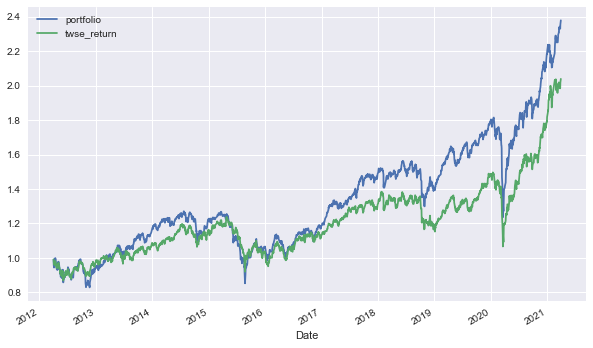

In [20]:
cum_ret.plot(x='Date',figsize=(10,6))

In [18]:
# 績效報表 #
yearly_mean_ret = (((cum_ret[['portfolio','twse_return']].tail(1)**(1/len(cum_ret)))**252-1)*100).reset_index(drop=True)
yearly_std = cum_ret[['portfolio','twse_return']].std()*(252**(0.5))
Rf = 1
sp_ratio = (yearly_mean_ret-Rf)/yearly_std
roll_max = cum_ret[['portfolio','twse_return']].cummax()
draw_down = (cum_ret[['portfolio','twse_return']]-roll_max)/roll_max
MDD = draw_down.min()*100
performace_report = pd.DataFrame({
    'portfolio':[yearly_mean_ret['portfolio'].values[0],
                 yearly_std['portfolio'],
                 sp_ratio['portfolio'].values[0],
                 MDD['portfolio']],
    'twse_return':[yearly_mean_ret['twse_return'].values[0],
                   yearly_std['twse_return'],
                   sp_ratio['twse_return'].values[0],
                   MDD['twse_return']]}
    ,index= ['年化報酬','年化波動度','夏普指標','最大回檔'])
performace_report

,portfolio,twse_return
年化報酬,10.434297,8.501988
年化波動度,5.006992,3.374849
夏普指標,1.884224,2.222911
最大回檔,-32.913067,-28.723409


In [19]:
pf2020 = mean_7[(mean_7['year']==2020) & (mean_7['負債比率'] < 65) & (mean_7['score']>=1)]['公司代碼'].to_list()
stk_info[['證券碼','證券名稱']][stk_info['證券碼'].isin(pf2020)].reset_index(drop=True)

,證券碼,證券名稱
0,1104,環泥
1,1201,味全
2,1225,福懋油
3,1227,佳格
4,1307,三芳
...,...,...
71,8039,台虹
72,8150,南茂
73,9907,統一實
74,9930,中聯資源
